# Frequency analysis for the naturalised 7dLF ($m^3/s$) each water year, i.e., $Q_{7,T}$

The notebook is trying to do a low flow frequency analysis as a demostration.

0. <a href='#0.-Data'>Data</a>
1. <a href='#1.-Method'>Method</a>
2. <a href='#2.-Frequency-analysis-for-7dLF-values'>Frequency analysis for 7dLF values</a>
3. <a href='#3.-Statistical-tests'>Statistical tests</a>
4. <a href='#4.-References'>References</a>

In [1]:
import mpl_setting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', None)

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def highlight_cols(s, col_dict):
    if s.name in col_dict.keys():
        return ['background-color: {}'.format(col_dict[s.name])] * len(s)
    return [''] * len(s)

## 0. Data

The naturalised daily flow time series at Pomahaka at Burkes Ford were used for this illustration. The following string contains the information on the 7dLF for each irrigation season:

In [2]:
s = """Start,End,7dLF,Start_7dLF,End_7dLF,Gap,Qmin,Date_Qmin
1961-10-01,1962-04-30,2.6394259857142837,1962-01-29,1962-02-04,10,2.4227155,1962-02-04
1962-10-01,1963-04-30,2.149641771428567,1963-01-01,1963-01-07,5,2.0677852,1963-01-05
1963-10-01,1964-04-30,1.8367705714285714,1964-04-24,1964-04-30,0,1.1692573,1964-04-27
1964-10-01,1965-04-30,8.369713714285714,1965-01-20,1965-01-26,62,5.893383,1965-01-24
1965-10-01,1966-04-30,2.4065190857142857,1966-03-20,1966-03-26,8,2.2217765,1966-03-26
1966-10-01,1967-04-30,3.9194720514285715,1967-02-26,1967-03-04,0,3.5330023,1967-03-01
1967-10-01,1968-04-30,2.2791426285714267,1968-02-23,1968-02-29,27,2.013254,1968-02-28
1968-10-01,1969-04-30,3.540507757142857,1969-03-01,1969-03-07,44,3.071459,1969-03-05
1969-10-01,1970-04-30,6.023305728571428,1969-12-11,1969-12-17,46,4.7035637,1969-12-16
1970-10-01,1971-04-30,1.273914971428573,1971-02-17,1971-02-23,34,1.1582014,1971-02-23
1971-10-01,1972-04-30,3.0987925857142895,1972-02-27,1972-03-04,48,2.7440453,1972-03-01
1972-10-01,1973-04-30,1.7734244000000001,1973-02-27,1973-03-05,54,1.4405556,1973-03-05
1973-10-01,1974-04-30,2.992941971428571,1974-03-30,1974-04-05,73,2.4982971,1974-04-04
1974-10-01,1975-04-30,2.6948571,1975-01-03,1975-01-09,0,2.540848,1975-01-07
1975-10-01,1976-04-30,2.4012653142857165,1976-02-19,1976-02-25,41,1.9526617,1976-02-25
1976-10-01,1977-04-30,3.1029794714285757,1977-03-25,1977-03-31,14,2.944878,1977-04-18
1977-10-01,1978-04-30,2.1554999714285796,1978-03-12,1978-03-18,6,2.0493061,1978-03-17
1978-10-01,1979-04-30,4.872162128571428,1979-04-05,1979-04-11,0,4.6438925,1979-04-08
1979-10-01,1980-04-30,6.014185857142857,1979-11-25,1979-12-01,0,5.5210615,1979-12-01
1980-10-01,1981-04-30,3.3234654142856974,1981-02-27,1981-03-05,0,3.0178921,1981-03-05
1981-10-01,1982-04-30,4.179776489428555,1982-03-24,1982-03-30,0,3.908176226,1982-03-29
1982-10-01,1983-04-30,12.03764865714284,1983-02-22,1983-02-28,0,10.5831231,1983-02-28
1983-10-01,1984-04-30,8.464411999999983,1983-11-26,1983-12-02,0,7.386832,1984-02-29
1984-10-01,1985-04-30,4.436816342857135,1985-04-13,1985-04-19,0,4.2974243,1985-04-18
1985-10-01,1986-04-30,3.248600845714278,1986-02-07,1986-02-13,0,2.9409192,1986-02-13
1986-10-01,1987-04-30,4.969832814285704,1987-01-07,1987-01-13,0,4.6191178,1987-01-19
1987-10-01,1988-04-30,6.041584842857134,1987-11-19,1987-11-25,0,5.4748609,1988-01-04
1988-10-01,1989-04-30,4.316116199999982,1988-12-30,1989-01-05,0,4.0693601,1989-01-04
1989-10-01,1990-04-30,3.5794775371428327,1990-02-11,1990-02-17,0,3.4022352,1990-02-05
1990-10-01,1991-04-30,5.586631142857114,1990-12-23,1990-12-29,0,5.2217419,1990-12-24
1991-10-01,1992-04-30,5.422966071428539,1992-01-13,1992-01-19,14,4.8680914,1992-01-18
1992-10-01,1993-04-30,6.343762371428531,1993-03-11,1993-03-17,0,5.8864466,1993-03-16
1993-10-01,1994-04-30,5.881726228571388,1994-02-12,1994-02-18,0,5.2467037,1994-02-17
1994-10-01,1995-04-30,3.0706560571428088,1995-03-04,1995-03-10,0,2.8350237,1995-03-09
1995-10-01,1996-04-30,3.6053413471428164,1996-02-26,1996-03-03,0,3.1333178,1996-03-08
1996-10-01,1997-04-30,6.346209636857102,1997-03-30,1997-04-05,0,5.2168547,1997-01-10
1997-10-01,1998-04-30,4.2551022428571,1998-01-31,1998-02-06,0,3.9993785,1998-02-05
1998-10-01,1999-04-30,2.220254285714245,1999-02-20,1999-02-26,0,2.1042746,1999-02-21
1999-10-01,2000-04-30,5.072944128571388,2000-02-29,2000-03-06,0,4.660323,2000-03-11
2000-10-01,2001-04-30,3.2694489857142495,2001-03-23,2001-03-29,0,3.0810618,2001-03-28
2001-10-01,2002-04-30,4.6368996714285355,2002-03-25,2002-03-31,0,4.386756,2002-03-29
2002-10-01,2003-04-30,2.9640225142856744,2003-03-24,2003-03-30,0,2.8674045,2003-03-28
2003-10-01,2004-04-30,2.3999695428571024,2004-01-24,2004-01-30,0,2.2204755,2004-01-18
2004-10-01,2005-04-30,6.11979757142853,2005-03-18,2005-03-24,0,5.8629774,2005-03-07
2005-10-01,2006-04-30,5.444062899999959,2006-02-16,2006-02-22,0,4.949358,2006-02-20
2006-10-01,2007-04-30,3.58869270385711,2007-02-28,2007-03-06,0,3.338081,2007-03-06
2007-10-01,2008-04-30,3.0036101445497567,2008-02-23,2008-02-29,0,2.5657243325049985,2008-02-11
2008-10-01,2009-04-30,3.3434912117716347,2009-02-04,2009-02-10,0,3.0097295852705637,2009-02-08
2009-10-01,2010-04-30,3.5102478225091303,2010-03-06,2010-03-12,0,3.4010038277123287,2010-03-10
2010-10-01,2011-04-30,4.673468248060878,2010-12-17,2010-12-23,0,3.977166339276408,2010-12-23
2011-10-01,2012-04-30,3.805294986151986,2012-01-05,2012-01-11,0,3.4239644799375184,2012-01-10
2012-10-01,2013-04-30,2.480558287227557,2013-03-26,2013-04-01,0,2.3066291492948183,2013-03-31
2013-10-01,2014-04-30,4.744236565797558,2013-12-06,2013-12-12,0,4.317827819010959,2013-12-07
2014-10-01,2015-04-30,2.9896896359740217,2015-01-27,2015-02-02,0,2.8624367263239106,2015-02-01
2015-10-01,2016-04-30,3.5370863161670845,2016-02-11,2016-02-17,0,3.311899466994726,2016-02-16
2016-10-01,2017-04-30,4.2747316552719585,2017-04-05,2017-04-11,0,4.053558827400114,2017-04-11
2017-10-01,2018-04-30,2.3532534707842134,2018-01-25,2018-01-31,0,1.986384046728106,2018-01-31
2018-10-01,2019-04-30,3.220794840509498,2019-03-30,2019-04-05,0,2.938744209190972,2019-04-02
2019-10-01,2020-04-30,6.2910122941345765,2020-03-02,2020-03-08,3,5.755938781621401,2020-03-07
2020-10-01,2021-04-30,3.24290522380256,2021-04-07,2021-04-13,0,3.1802992331985434,2021-04-10
"""

In [3]:
# Extract the 7dLF values from the CSV string, and make them as an 1d numpy array
ss = [i for i in s.split('\n')][1:-1]
x = np.array([float(i.split(',')[2]) for i in ss])
x

array([ 2.63942599,  2.14964177,  1.83677057,  8.36971371,  2.40651909,
        3.91947205,  2.27914263,  3.54050776,  6.02330573,  1.27391497,
        3.09879259,  1.7734244 ,  2.99294197,  2.6948571 ,  2.40126531,
        3.10297947,  2.15549997,  4.87216213,  6.01418586,  3.32346541,
        4.17977649, 12.03764866,  8.464412  ,  4.43681634,  3.24860085,
        4.96983281,  6.04158484,  4.3161162 ,  3.57947754,  5.58663114,
        5.42296607,  6.34376237,  5.88172623,  3.07065606,  3.60534135,
        6.34620964,  4.25510224,  2.22025429,  5.07294413,  3.26944899,
        4.63689967,  2.96402251,  2.39996954,  6.11979757,  5.4440629 ,
        3.5886927 ,  3.00361014,  3.34349121,  3.51024782,  4.67346825,
        3.80529499,  2.48055829,  4.74423657,  2.98968964,  3.53708632,
        4.27473166,  2.35325347,  3.22079484,  6.29101229,  3.24290522])

[<a href='#Frequency-analysis-for-the-naturalised-7dLF-($m^3/s$)-each-water-year,-i.e.,-$Q_{7,T}$'>Back to top</a>]

## 1. Method

For considering the zero D-day low flow records, the total probability theorem given as:

$$
P\{X \geq x \mid X \geq 0\} = P\{X \geq x \mid X = 0\} \cdot P\{X = 0\} + P\{X \geq x \mid X > 0\} \cdot P\{X > 0\}
$$

Since

$$
P\{X \geq x \mid X = 0\} = 0
$$

Therefore,

$$
P\{X \geq x \mid X \geq 0\} = P\{X \geq x \mid X > 0\} \cdot P\{X > 0\}
$$

where $P\{X > 0\}$ is the fraction of non-zero values, and $P\{X \geq x \mid X > 0\}$ would be estimated by a standard analysis of the non-zero values with the same size taken to be equal to the number of non-zero values. This can also be written as:

$$
1-F(x)=k \cdot \left[1-F^{*}(x)\right]
$$

where
$$
k = P\{X > 0\}
$$

$$
F(x)=P\{X \leq x \mid X \geq 0\}
$$

$$
F^{*}(x)=P\{X \leq x \mid X > 0\}
$$

This is a mixed distribution which has a *probability mass* for $X=0$ and a *continuous probability* distribution for $X>0$.

This equation can be used to estimate the magnitude of an event with return period $T$ by solving first for $F^{*}(x)$ and then using the inverse of $F^{*}(x)$ to get the value of $X$. This depends on the probability distribution function applied to the non-zero values.

Considering that the return period of 7dLF values can be estimated by:

$$
T=\frac{1}{F(x)}
$$

then

$$
F^{*}(x)=\frac{1 / T-1+k}{k}
$$

The appicability of the above equation depends on getting positive values for the probability $F^{*}(x)$. This means, the application of the total probability theorem to the low flow analysis depends on the relation between $T$ and $k$. It is valid for a return period that satisfies

$$
k \geq \frac{T-1}{T}
$$

negative values obtained for $F^{*}(x)$ mean that, for the given return period $T$ and fraction $k$, the probability of observing the flow value, $x$, is zero for the river under consideration. For the commonly used return periods, the  fractions of non-zero values, $k$, that would be greater are given:

In [4]:
# The target annual return periods
return_period = np.array([1.5, 2, 3, 4, 5, 10, 20, 25, 30, 40, 50, 100])

# Calculate the fraction of non-zero values i.e., P(X != 0)
k = x[x != 0].size / x.size

# The value of the CDF i.e., [F*(x) = P(X <= x|X != 0)] >= 0
ref = pd.DataFrame({'Annual return period': return_period})
ref['k no less than'] = ref.eval('(`Annual return period` - 1) / `Annual return period`')
ref['F(x)'] = ref.eval('1 / `Annual return period`')
ref['F*(x)'] = ref.eval('(1 / `Annual return period` - 1 + @k) / @k')

ref.style.apply(highlight_cols, col_dict={'F*(x)': 'yellow'}).set_caption(f'k = P{{X > 0}} = {k:.6g} in this case')

,Annual return period,k no less than,F(x),F*(x)
0,1.500000,0.333333,0.666667,0.666667
1,2.000000,0.500000,0.500000,0.500000
2,3.000000,0.666667,0.333333,0.333333
3,4.000000,0.750000,0.250000,0.250000
4,5.000000,0.800000,0.200000,0.200000
5,10.000000,0.900000,0.100000,0.100000
6,20.000000,0.950000,0.050000,0.050000
7,25.000000,0.960000,0.040000,0.040000
8,30.000000,0.966667,0.033333,0.033333
9,40.000000,0.975000,0.025000,0.025000


[<a href='#Frequency-analysis-for-the-naturalised-7dLF-($m^3/s$)-each-water-year,-i.e.,-$Q_{7,T}$'>Back to top</a>]

## 2. Frequency analysis for 7dLF values

The continuous distributions used for this task are:
* **Gamma** Distribution: [`stats.gamma`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_gamma.html)
* **Generalized Extreme Value** Distribution: [`stats.genextreme`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_genextreme.html)
* **Log Normal** (Cobb-Douglass) Distribution: [`stats.lognorm`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_lognorm.html)
* **Pearson Type III** distribution: [`stats.pearson3`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearson3.html)
* **Weibull Minimum Extreme Value** Distribution: [`stats.weibull_min`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_weibull_min.html)

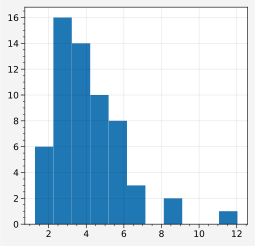

In [5]:
# Make a quick histogram for a feel of how the data is distributed
bins = 11
plt.hist(x, bins=bins);

In [6]:
# Sample histogram, and the mid point (for calculating predicted frequency from fitted distributions)
freq, brks = np.histogram(x, bins=bins)
bin_size = np.diff(brks).mean()
x_mid = (brks + np.roll(brks, -1))[:-1] / 2

In [7]:
# Make a dictionary of the above probability
dists = {
    'Gamma': stats.gamma,
    'Generalized Extreme Value': stats.genextreme,
    'Log Normal': stats.lognorm,
    'Pearson Type III': stats.pearson3,
    'Weibull Minimum Extreme Value': stats.weibull_min,
}

df = pd.DataFrame(
    {
        'Dist_frozen': '',
        'shape': '',
        'loc': np.nan,
        'scale': np.nan,
        'SSE': np.nan
    },
    index=dists.keys()
)

In [8]:
# List of requested values under different return periods
# Always be cautious of zero CDF - value exists?
tmp = ref.query('`F*(x)` > 0')
res_df = tmp.loc[tmp.index, ['Annual return period']]

# The cumulative probability of non zero 7dLF values
F_adj = tmp['F*(x)'].values

In [9]:
# The smaple size and initial guess for location and scale
sample_size, init_loc, init_scale = x.size, x.mean(), x.std()

# Fit these distributions and put the parameters into the DataFrame
for name, dist in dists.items():
    # Fit the distribution
    *shape, loc, scale = dist.fit(data=x, loc=init_loc, scale=init_scale)

    df.at[name, 'shape'] = shape
    df.loc[name, ['loc', 'scale']] = loc, scale

    # Calculate the modelled frequency from the derived distribution (frozen)
    dist_frozen = dist(*shape, loc=loc, scale=scale)
    freq_pred = dist_frozen.pdf(x_mid) * bin_size * sample_size

    df.at[name, 'Dist_frozen'] = dist_frozen

    # Calculate the distribution-modelled SSE
    df.at[name, 'SSE'] = ((freq - freq_pred) ** 2).sum()

    res_df = res_df.join(pd.DataFrame({name: dist_frozen.ppf(F_adj)}))

# Order the distribution by SSE in ascending order
df = df.sort_values(by='SSE', ascending=True)
res_df = res_df.loc[:, ['Annual return period'] + df.index.tolist()]

In [10]:
df.style.bar(subset='SSE', color='pink').set_caption('Ascending order of SSE')

,Dist_frozen,shape,loc,scale,SSE
Log Normal,,[0.458849860130409],0.296119,3.419105,10.955879
Gamma,,[3.061260201333987],0.984936,1.016709,11.791994
Pearson Type III,,[1.143115390477951],4.097359,1.778914,11.792825
Generalized Extreme Value,,[-0.1046323490184408],3.227163,1.258877,13.138728
Weibull Minimum Extreme Value,,[1.6393740382761481],1.199168,3.245266,25.305743


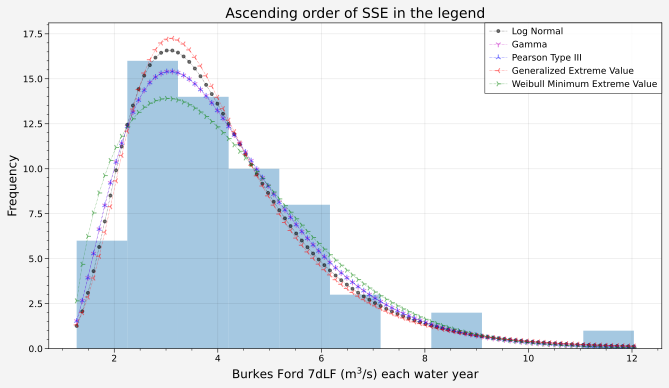

In [11]:
# Create some data for plot
x_plot = np.linspace(x.min(), x.max(), 100)

# Figure size and xlabel
figsize = (11, 6)
xlabel = 'Burkes Ford 7dLF ($m^3/s$) each water year'
colors = ('k', 'm', 'b', 'r', 'g')  # color
markers = ('.', '1', '2', '3', '4')  # Marker type

# The distribution name of least SSE
least_sse = df.index[0]

# Make a plot
fig, ax = plt.subplots(figsize=figsize)
ax.hist(x, bins=bins, density=False, alpha=.4)
for (i, r), color, marker in zip(df.iterrows(), colors, markers):
    y_pred = r['Dist_frozen'].pdf(x_plot) * bin_size * sample_size
    ax.plot(x_plot, y_pred, f'{marker}-.{color}', lw=.4, markersize=6, alpha=.5, label=i)
ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Ascending order of SSE in the legend', fontsize=14)
ax.legend();

**Results of $Q_{7,T}$**

In [12]:
res_df.style.apply(highlight_cols, col_dict={least_sse: 'yellow'})\
      .set_caption('The Q_{7,T} results from the fitted distributions (least SSE highlighted):')

,Annual return period,Log Normal,Gamma,Pearson Type III,Generalized Extreme Value,Weibull Minimum Extreme Value
0,1.500000,4.462376,4.546088,4.546101,4.418977,4.636053
1,2.000000,3.715224,3.765794,3.765793,3.697519,3.794277
2,3.000000,3.102062,3.109884,3.109874,3.109349,3.070308
3,4.000000,2.805132,2.790444,2.790432,2.822918,2.716893
4,5.000000,2.619913,2.591876,2.591863,2.642752,2.499021
5,10.000000,2.195141,2.143724,2.143710,2.221727,2.021590
6,20.000000,1.903551,1.848379,1.848367,1.922271,1.729322
7,25.000000,1.827358,1.773937,1.773927,1.841940,1.660392
8,30.000000,1.769983,1.718845,1.718835,1.780744,1.610982
9,40.000000,1.687157,1.640970,1.640962,1.691199,1.543802


[<a href='#Frequency-analysis-for-the-naturalised-7dLF-($m^3/s$)-each-water-year,-i.e.,-$Q_{7,T}$'>Back to top</a>]

## 3. Statistical tests

This part has been done yet...

[<a href='#Frequency-analysis-for-the-naturalised-7dLF-($m^3/s$)-each-water-year,-i.e.,-$Q_{7,T}$'>Back to top</a>]

## 4. References

* Eris, E., Aksoy, H., Onoz, B., Cetin, M., Yuce, M., & Selek, B. et al. (2018). *Frequency analysis of low flows in intermittent and non-intermittent rivers from hydrological basins in Turkey*. Water Supply, 19(1), 30-39. doi: 10.2166/ws.2018.051

* https://nedyoxall.github.io/fitting_all_of_scipys_distributions.html

[<a href='#Frequency-analysis-for-the-naturalised-7dLF-($m^3/s$)-each-water-year,-i.e.,-$Q_{7,T}$'>Back to top</a>]